# 📈 Linear Regression with Gradient Descent
This notebook demonstrates linear regression using **gradient descent**, including visualization of cost function, convergence, and predictions.

## Step 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Create Dataset

In [2]:
# Training dataset
X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=float)
Y = np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000], dtype=float)
m = len(X)

## Step 3: Hypothesis & Cost Function

In [3]:
def predict(x, w, b):
    return w * x + b

def compute_cost(X, Y, w, b):
    return (1/(2*m)) * np.sum((predict(X, w, b) - Y)**2)

## Step 4: Compute Gradients

In [4]:
def compute_gradients(X, Y, w, b):
    dj_dw = (1/m) * np.sum((predict(X, w, b) - Y) * X)
    dj_db = (1/m) * np.sum((predict(X, w, b) - Y))
    return dj_dw, dj_db

## Step 5: Gradient Descent Algorithm

In [5]:
def gradient_descent(X, Y, w, b, alpha, iters):
    cost_history = []
    for i in range(iters):
        dj_dw, dj_db = compute_gradients(X, Y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost_history.append(compute_cost(X, Y, w, b))
    return w, b, cost_history

## Step 6: Train the Model

In [6]:
w_init, b_init = 0, 0
alpha = 0.01
iters = 1000
w_final, b_final, J_hist = gradient_descent(X, Y, w_init, b_init, alpha, iters)

print(f"Initial parameters: w={w_init}, b={b_init}, cost={compute_cost(X,Y,w_init,b_init):.2f}")
print(f"Learned parameters: w={w_final:.2f}, b={b_final:.2f}, cost={J_hist[-1]:.2f}")

Initial parameters: w=0, b=0, cost=19250000.00
Learned parameters: w=997.53, b=17.20, cost=31.70


## Step 7: Plot Regression Before & After Gradient Descent

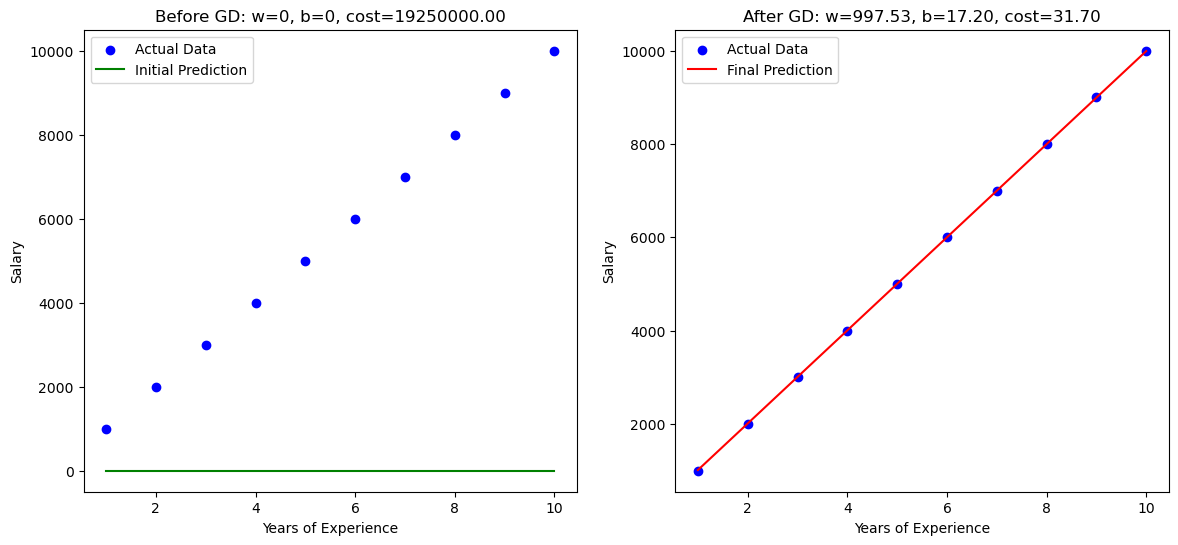

In [7]:
plt.figure(figsize=(14,6))

# Before GD
plt.subplot(1,2,1)
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X, predict(X, w_init, b_init), color="green", label="Initial Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title(f"Before GD: w={w_init}, b={b_init}, cost={compute_cost(X,Y,w_init,b_init):.2f}")
plt.legend()

# After GD
plt.subplot(1,2,2)
plt.scatter(X, Y, color="blue", label="Actual Data")
plt.plot(X, predict(X, w_final, b_final), color="red", label="Final Prediction")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title(f"After GD: w={w_final:.2f}, b={b_final:.2f}, cost={J_hist[-1]:.2f}")
plt.legend()

plt.show()

## Step 8: Cost Function Surface (3D)

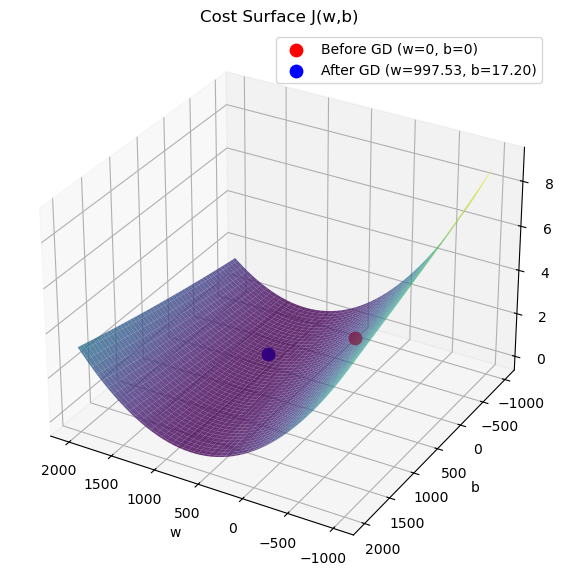

In [8]:
W = np.linspace(-1000, 2000, 100)
B = np.linspace(-1000, 2000, 100)
WW, BB = np.meshgrid(W, B)

J_vals = np.zeros(WW.shape)
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        J_vals[i,j] = compute_cost(X, Y, WW[i,j], BB[i,j])

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(WW, BB, J_vals, cmap="viridis", alpha=0.8)

# Mark points
ax.scatter(w_init, b_init, compute_cost(X,Y,w_init,b_init),
           color="red", s=80, label=f"Before GD (w={w_init}, b={b_init})")
ax.scatter(w_final, b_final, compute_cost(X,Y,w_final,b_final),
           color="blue", s=80, label=f"After GD (w={w_final:.2f}, b={b_final:.2f})")

ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("Cost J(w,b)")
ax.set_title("Cost Surface J(w,b)")
ax.view_init(elev=30, azim=120)
ax.legend()
plt.show()

## Step 9: Convergence of Gradient Descent

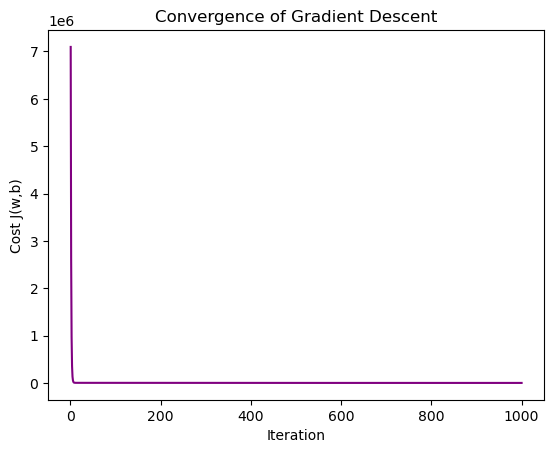

In [9]:
plt.plot(range(1, iters+1), J_hist, color="purple")
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Convergence of Gradient Descent")
plt.show()

## Step 10: Predict Salary for User Input

In [10]:
exp = float(input("Enter years of experience to predict salary: "))
pred_salary = predict(exp, w_final, b_final)
print(f"Predicted Salary for {exp} years experience = {pred_salary:.2f}")

Enter years of experience to predict salary:  11


Predicted Salary for 11.0 years experience = 10990.02
